### Final Project Part 3

Author: Trevin Kurniawan

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import altair as alt
import plotly
import plotly.graph_objs as go
from collections import Counter

In [4]:
data = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD')
data

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674859,1d95e9824ccca1b043aadf2ff689d364e06a55bfccf63f...,JF416627,NaN,09/30/2022 02:15:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,6,9,41.776651,-87.745551,POINT (-87.745551079774 41.776651061283)
674860,075f9f91de0f9fc9d70cb05044036c8be5fbf79a596fa8...,JF416237,NaN,09/30/2022 08:30:00 AM,30,STOP SIGN/FLASHER,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,8,6,9,41.735805,-87.655915,POINT (-87.655914665989 41.735804938384)
674861,9ede74f15c1f514905a62cf09a77f7eed97deb3b07a0a8...,JF443854,NaN,10/21/2022 09:20:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,21,6,10,41.867134,-87.644238,POINT (-87.644237519792 41.867134208293)
674862,42f8a277004db476edcaefa24461825e0ab8d55dcd34cc...,JF446727,NaN,10/23/2022 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,16,1,10,41.893959,-87.647841,POINT (-87.647841187649 41.893958762604)


### Contextual visualizations

We will be using matplotlib to plot the count of car crashes in different weather conditions. We are also going to be using a bar graph; this visualization will showcase the trend of car crashes according to the weather conditions.

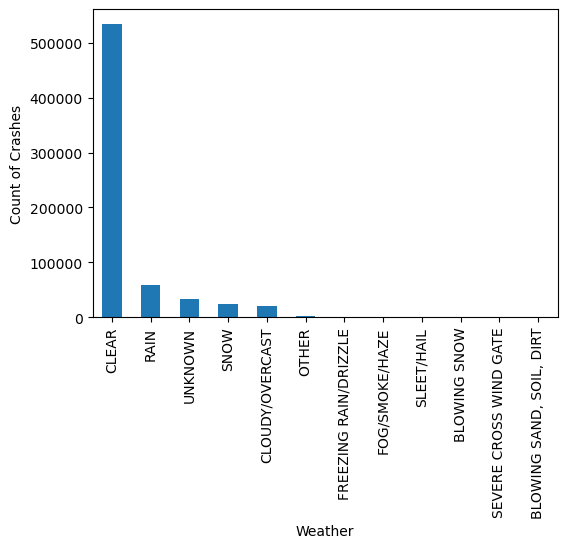

In [5]:
data['WEATHER_CONDITION'].value_counts().plot(ylabel = 'Count of Crashes', xlabel = 'Weather', kind='bar', figsize=(6,4))

The visualization below utilizes matplotlib to plot the count of car crashes in different speed limits. We will again be using a bar graph; this visualization showcase the trend of car crashes in 30mph speed limit roads.

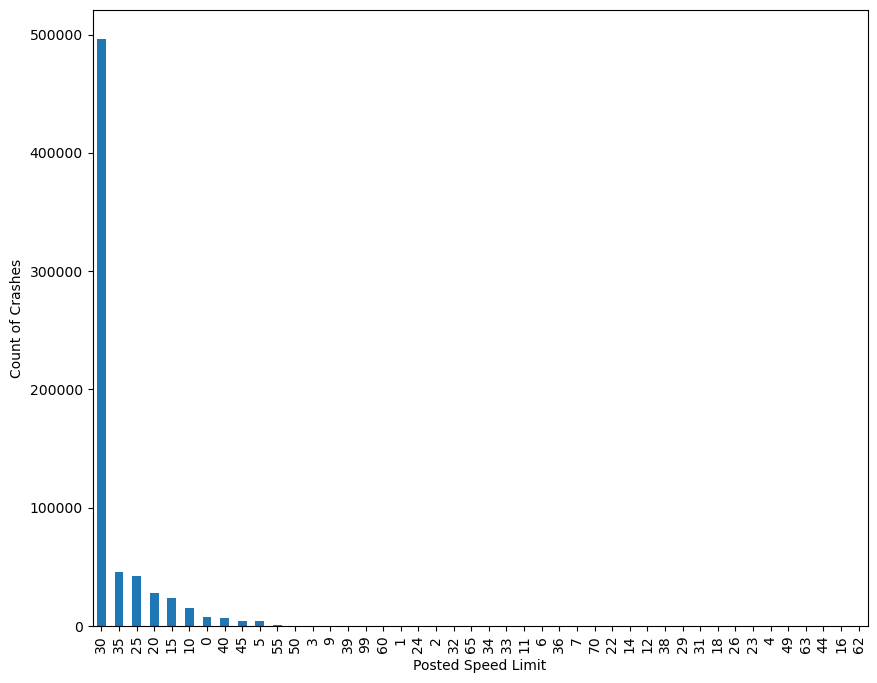

In [6]:
data['POSTED_SPEED_LIMIT'].value_counts().plot(ylabel = 'Count of Crashes', xlabel = 'Posted Speed Limit', kind='bar', figsize=(10,8))

### Interactive Visualization

In order to use the visualization below, the user need to select one of the possible columns to create a different histogram. The user is also given a choice to group the visualizations according to different conditions such as lighting, weather conditions, car crash types and speed limit. The user can select a group using the column that will plot several histograms from the values given in the selected group by column.

In [7]:
column = ['CRASH_HOUR', "CRASH_MONTH", 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING']
group_by = ["none", "LIGHTING_CONDITION", 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'POSTED_SPEED_LIMIT']

@ipywidgets.interact(column = column, group_by = group_by)
def make_plot_hist(column, group_by):
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    if group_by == "none":
        data.hist(column = column, ax = ax)
    else:
        data.hist(column = column, by = group_by, ax = ax)
    plt.show()

interactive(children=(Dropdown(description='column', options=('CRASH_HOUR', 'CRASH_MONTH', 'INJURIES_TOTAL', '…

This second visualization will be using a scatterplot to show correlation and trends for all the accidents that occured in Chicago, we will be using longitude and latitude from the dataset. The user can select an X and Y field according to their preference. THe user can also choose the color field to change the color points of the visualization, the user can categorise the color points according to the total number of injuries, number of cars that is involves in the accidents and the road speed limits. If the user select 'none' the user will not pick a color field for the plot.

This visualization below will allow user to filter the street name and it will filter out the points that are not the same as the street name on both the location and the selected x and y fields. Users will be able to identify the streets and locations clearly by selecting the filter option

In [8]:
xfields = ["POSTED_SPEED_LIMIT", "WEATHER_CONDITION", "LIGHTING_CONDITION", "TRAFFICWAY_TYPE"]
yfields = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR']
colorfields = ["none", 'INJURIES_TOTAL', 'NUM_UNITS', 'POSTED_SPEED_LIMIT']

data_nona = data.dropna(subset=['LATITUDE', 'LONGITUDE'])
data_nona = data_nona[(data_nona['LATITUDE'] != 0) & (data_nona['LONGITUDE'] != 0)]

unique_street = data.STREET_NAME.unique()

In [9]:
@ipywidgets.interact(xfield = xfields, yfield = yfields, colorfield = colorfields, 
                     street = ipywidgets.Checkbox(False, description='Filter Street'), streetname = unique_street)

def make_plot(xfield, yfield, colorfield, street, streetname):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
    plt.xlabel(xfield)
    plt.xticks(rotation = 90)
    plt.ylabel(yfield)
    plt.yticks(rotation = 90)
    data_crash = data_nona
    if street:
        data_crash = data_crash[data_crash.STREET_NAME == streetname] 
    freq = data_crash.groupby([xfield, yfield], as_index=False).size()
    if colorfield == "none":
        ax1.scatter(data_crash["LONGITUDE"], data_crash["LATITUDE"], alpha=0.3)
    else:
        ax1.scatter(data_crash["LONGITUDE"], data_crash["LATITUDE"], c=np.log10(crash_data[colorfield]), cmap = 'rainbow')
    ax2.scatter(freq[xfield], freq[yfield],s = freq["size"] * 0.05 + 20, alpha=0.8)
    plt.show()

interactive(children=(Dropdown(description='xfield', options=('POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGH…

In [12]:
myJekyllSaveDir = '/Users/trevin kyle/hollow27mc.github.io/assets/json/'